In [104]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import datetime as dt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels import tsa
import statsmodels.graphics as sg
from statsmodels.stats import stattools as st
import sklearn


import matplotlib.pylab as plt

import seaborn as sns
sns.set_theme()

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
df = pd.read_csv('../data/ts.csv', index_col=0, parse_dates=True)
df.shape, df.head()

((43, 11),
                   rynek  inflacja_r  inflacja_q  stopa_procentowa  \
 2014-03-31  6193.211456       100.6       100.2            0.0446   
 2014-06-30  6227.984614       100.3       100.0            0.0447   
 2014-09-30  6357.260998        99.7        99.5            0.0443   
 2014-12-31  6438.874574        99.3        99.6            0.0388   
 2015-03-31  6473.616559        98.5        99.5            0.0348   
 
             liczba_kredytow  tempo_wzrostu  ufnosc  duze_zakupy  bezrobocie  \
 2014-03-31          41942.0          104.2   -20.5        -16.3        13.5   
 2014-06-30          45499.0          104.1   -16.8        -15.0        12.0   
 2014-09-30          43653.0          103.3   -16.9        -12.7        11.5   
 2014-12-31          42993.0          103.3   -13.8        -10.7        11.4   
 2015-03-31          42169.0          104.0   -14.9        -11.5        11.5   
 
             spr_detaliczna    pkb  
 2014-03-31           105.5  103.8  
 2014-06-30

In [87]:
df2 = pd.read_csv('../data/wynagrodzenie.csv', index_col=0, parse_dates=True)
df2.shape, df2.head()

((58, 6),
             wynag_gosp  wynag_przed  zatrud_ogolem  zatrud_przed  zatrud_gosp  \
 2010-03-31     3241.88      3382.45         8034.0        5304.0       2730.0   
 2010-06-30     3270.87      3420.32         8110.0        5351.0       2759.0   
 2010-09-30     3258.95      3424.61         8176.0        5392.0       2784.0   
 2010-12-31     3371.07      3499.96         8214.0        5449.0       2765.0   
 2011-03-31     3392.00      3521.75         8264.0        5512.0       2752.0   
 
                   wynag  
 2010-03-31  3334.683495  
 2010-06-30  3369.477515  
 2010-09-30  3368.201311  
 2010-12-31  3456.572996  
 2011-03-31  3478.541868  )

In [88]:
df = pd.merge(left=df, right=df2["wynag"], left_index=True, right_index=True)
df.head()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb,wynag
2014-03-31,6193.211456,100.6,100.2,0.0446,41942.0,104.2,-20.5,-16.3,13.5,105.5,103.8,3882.041728
2014-06-30,6227.984614,100.3,100.0,0.0447,45499.0,104.1,-16.8,-15.0,12.0,105.1,103.9,3922.805136
2014-09-30,6357.260998,99.7,99.5,0.0443,43653.0,103.3,-16.9,-12.7,11.5,102.6,104.2,3948.311807
2014-12-31,6438.874574,99.3,99.6,0.0388,42993.0,103.3,-13.8,-10.7,11.4,103.7,103.9,3986.074690
2015-03-31,6473.616559,98.5,99.5,0.0348,42169.0,104.0,-14.9,-11.5,11.5,104.4,104.3,4028.086865


In [89]:
df.index

DatetimeIndex(['2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
               '2024-03-31', '2024-06-30'],
              dtype='datetime64[ns]', freq=None)

In [90]:
df["inflacja_q"]

2014-03-31    100.2
2014-06-30    100.0
2014-09-30     99.5
2014-12-31     99.6
2015-03-31     99.5
2015-06-30    100.5
2015-09-30     99.6
2015-12-31     99.7
2016-03-31     99.3
2016-06-30    100.5
2016-09-30     99.7
2016-12-31    100.7
2017-03-31    101.1
2017-06-30    100.3
2017-09-30     99.8
2017-12-31    101.1
2018-03-31    100.4
2018-06-30    100.5
2018-09-30    100.0
2018-12-31    100.5
2019-03-31    100.2
2019-06-30    101.7
2019-09-30    100.3
2019-12-31    100.6
2020-03-31    102.0
2020-06-30    100.3
2020-09-30    100.1
2020-12-31    100.4
2021-03-31    102.1
2021-06-30    101.9
2021-09-30    101.0
2021-12-31    102.6
2022-03-31    103.8
2022-06-30    105.8
2022-09-30    103.1
2022-12-31    103.6
2023-03-31    104.3
2023-06-30    101.9
2023-09-30     99.7
2023-12-31    100.5
2024-03-31    100.9
2024-06-30    101.4
Name: inflacja_q, dtype: float64

In [91]:
infl_arr = df["inflacja_q"].to_numpy()
inflacja_q_acc_arr = np.ones_like(infl_arr)
num = len(infl_arr)
for i in range(1, num):
    inflacja_q_acc_arr[i] = inflacja_q_acc_arr[i-1] / 100 * infl_arr[i-1]


df["inflacja_q_kum"] = inflacja_q_acc_arr
df.tail()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb,wynag,inflacja_q_kum
2023-06-30,11928.471147,113.1,101.9,0.0877,30798.0,112.2,-30.1,-32.1,5.1,92.7,99.4,7278.507128,1.429369
2023-09-30,12335.591393,109.7,99.7,0.0779,40749.0,110.8,-22.5,-24.5,5.0,101.4,100.5,7498.418749,1.456527
2023-12-31,13037.926475,106.4,100.5,0.0808,68860.0,111.5,-16.1,-18.2,5.1,99.5,101.0,7684.873442,1.452157
2024-03-31,14942.844839,102.8,100.9,0.0796,64504.0,112.5,-12.5,-14.1,5.3,105.0,102.1,7954.361153,1.459418
2024-06-30,14718.380953,102.5,101.4,0.0819,45434.0,110.9,-12.4,-12.8,4.9,104.8,103.2,8144.805614,1.472553


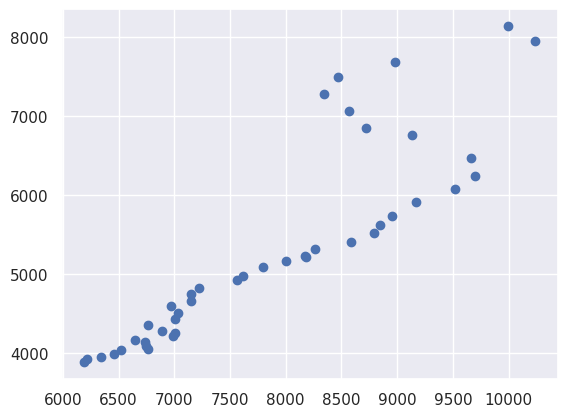

In [92]:
plt.scatter(df["rynek"]/inflacja_q_acc_arr, df["wynag"])

In [93]:
df.wynag/ inflacja_q_acc_arr

2014-03-31    3882.041728
2014-06-30    3914.975186
2014-09-30    3940.430945
2014-12-31    3998.108998
2015-03-31    4056.473908
2015-06-30    4090.768809
2015-09-30    4113.869572
2015-12-31    4178.640019
2016-03-31    4225.437307
2016-06-30    4297.411260
2016-09-30    4322.843980
2016-12-31    4354.716840
2017-03-31    4409.671599
2017-06-30    4429.780547
2017-09-30    4491.084020
2017-12-31    4588.612698
2018-03-31    4608.197746
2018-06-30    4679.868900
2018-09-30    4728.949529
2018-12-31    4821.672008
2019-03-31    4852.798668
2019-06-30    4947.681161
2019-09-30    4946.487823
2019-12-31    4988.298310
2020-03-31    5039.541700
2020-06-30    4852.340365
2020-09-30    5011.815138
2020-12-31    5111.930765
2021-03-31    5185.957566
2021-06-30    5177.280618
2021-09-30    5240.658997
2021-12-31    5341.937071
2022-03-31    5342.535822
2022-06-30    5336.626699
2022-09-30    5268.284068
2022-12-31    5178.588088
2023-03-31    5153.387216
2023-06-30    5092.113515
2023-09-30  

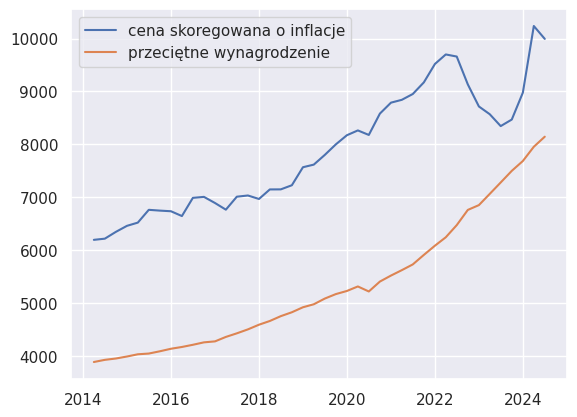

In [111]:
fig = plt.Figure()
ax = fig.gca()
ax.plot(df.index, df.rynek / df.inflacja_q_kum, label="cena skoregowana o inflacje")
ax.plot(df.index, df.wynag, label="przeciętne wynagrodzenie")
ax.legend()

fig.savefig('../images/ceva_vs_wynag.png')
display(fig)

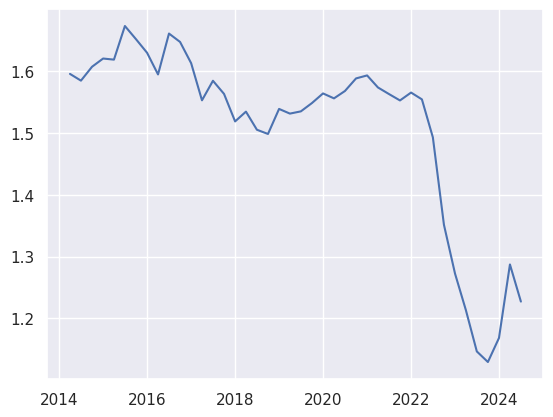

In [95]:
plt.plot(df.index, df.rynek / (df.inflacja_q_kum * df.wynag) )


In [96]:
ddf = pd.read_csv('../data/gus_budowa.csv', header=0, parse_dates=["data"], date_format="%Y-%m-%d")
ddf.set_index(keys="data", drop=True, inplace=True)
ddf.dtypes, ddf.head()

(ogolem                  float64
 indywidualne            float64
 sprzedaz_lub_wynajem    float64
 spoldzielcze            float64
 pozostale               float64
 dtype: object,
              ogolem  indywidualne  sprzedaz_lub_wynajem  spoldzielcze  \
 data                                                                    
 2014-01-01  12511.0        7155.0                4449.0         415.0   
 2014-02-01  12462.0        6714.0                5068.0         358.0   
 2014-03-01  10589.0        6530.0                3687.0         239.0   
 2014-04-01  11646.0        6102.0                5095.0         193.0   
 2014-05-01   8893.0        5516.0                3185.0          46.0   
 
             pozostale  
 data                   
 2014-01-01      492.0  
 2014-02-01      322.0  
 2014-03-01      133.0  
 2014-04-01      256.0  
 2014-05-01      146.0  )

In [97]:
ddf = ddf.resample(pd.offsets.QuarterEnd()).mean()


<Axes: xlabel='data'>

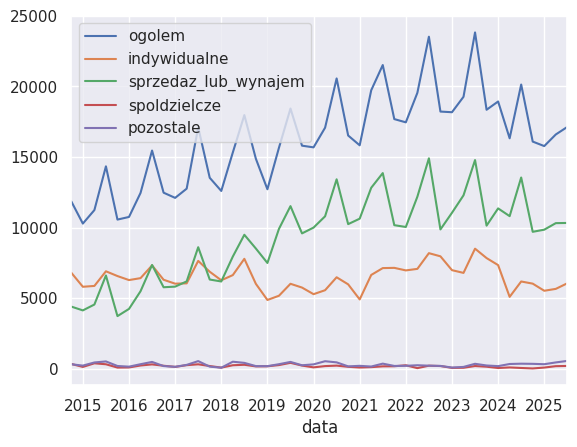

In [98]:
ddf.plot()

In [99]:
df = pd.merge(left=df, right=ddf["ogolem"], left_index=True, right_index=True)
df.head()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb,wynag,inflacja_q_kum,ogolem
2014-03-31,6193.211456,100.6,100.2,0.0446,41942.0,104.2,-20.5,-16.3,13.5,105.5,103.8,3882.041728,1.000000,11854.000000
2014-06-30,6227.984614,100.3,100.0,0.0447,45499.0,104.1,-16.8,-15.0,12.0,105.1,103.9,3922.805136,1.002000,10285.333333
2014-09-30,6357.260998,99.7,99.5,0.0443,43653.0,103.3,-16.9,-12.7,11.5,102.6,104.2,3948.311807,1.002000,11241.333333
2014-12-31,6438.874574,99.3,99.6,0.0388,42993.0,103.3,-13.8,-10.7,11.4,103.7,103.9,3986.074690,0.996990,14341.333333
2015-03-31,6473.616559,98.5,99.5,0.0348,42169.0,104.0,-14.9,-11.5,11.5,104.4,104.3,4028.086865,0.993002,10567.666667


<Axes: >

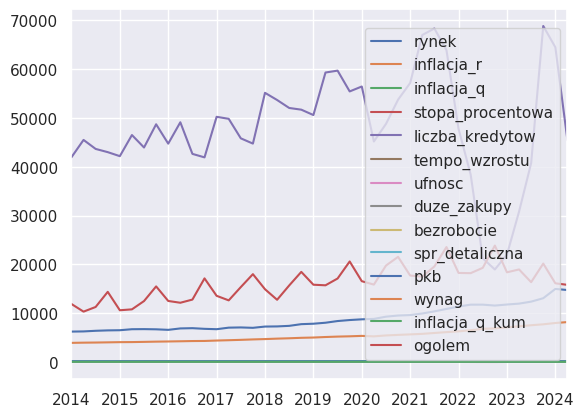

In [100]:
df.plot()

<Axes: >

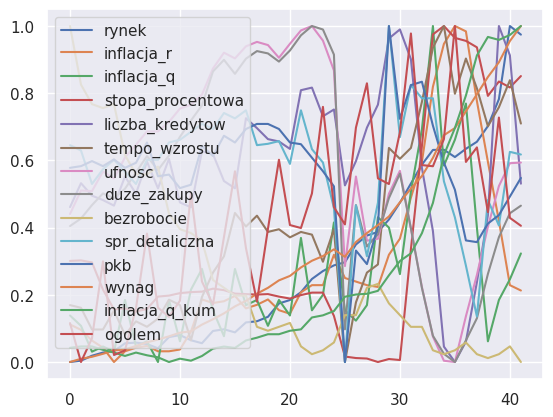

In [101]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
ndf_arr = min_max_scaler.fit_transform(df)
ndf = pd.DataFrame(data=ndf_arr, columns=df.columns)
ndf.plot()

In [102]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb,wynag,inflacja_q_kum,ogolem
rynek,1.000,0.697,0.573,0.735,-0.020,0.850,-0.544,-0.556,-0.680,-0.216,-0.177,0.988,0.942,0.616
inflacja_r,0.697,1.000,0.813,0.772,-0.477,0.844,-0.708,-0.648,-0.585,-0.259,-0.099,0.730,0.702,0.651
inflacja_q,0.573,0.813,1.000,0.588,-0.286,0.737,-0.591,-0.497,-0.501,0.049,0.137,0.557,0.456,0.543
stopa_procentowa,0.735,0.772,0.588,1.000,-0.513,0.806,-0.590,-0.602,-0.375,-0.195,-0.105,0.757,0.841,0.317
liczba_kredytow,-0.020,-0.477,-0.286,-0.513,1.000,-0.152,0.521,0.514,-0.133,0.377,0.302,-0.055,-0.188,0.037
tempo_wzrostu,0.850,0.844,0.737,0.806,-0.152,1.000,-0.484,-0.444,-0.687,0.028,0.162,0.868,0.817,0.589
ufnosc,-0.544,-0.708,-0.591,-0.590,0.521,-0.484,1.000,0.983,0.037,0.386,0.295,-0.503,-0.556,-0.354
duze_zakupy,-0.556,-0.648,-0.497,-0.602,0.514,-0.444,0.983,1.000,0.007,0.453,0.382,-0.518,-0.598,-0.285
bezrobocie,-0.680,-0.585,-0.501,-0.375,-0.133,-0.687,0.037,0.007,1.000,0.101,0.056,-0.728,-0.558,-0.709
spr_detaliczna,-0.216,-0.259,0.049,-0.195,0.377,0.028,0.386,0.453,0.101,1.000,0.901,-0.260,-0.339,-0.155


In [105]:
df["rpk"] = 0.0
df.loc[dt.datetime(year=2023, month=7, day=1): dt.datetime(year=2024, month=1, day=1), "rpk"] = 1.0
df.tail(12)

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb,wynag,inflacja_q_kum,ogolem,rpk
2021-09-30,10341.384137,105.4,101.0,0.0246,68353.0,109.6,-13.7,-7.3,6.1,106.1,106.7,5908.478395,1.127430,19550.666667,0.0
2021-12-31,10841.440443,107.7,102.6,0.0470,63918.0,110.0,-22.8,-16.7,5.8,110.0,108.7,6082.889002,1.138705,23528.000000,0.0
2022-03-31,11333.612554,109.7,103.8,0.0678,47767.0,111.7,-32.0,-26.9,5.8,109.0,108.9,6241.743643,1.168311,18222.333333,0.0
2022-06-30,11716.052702,113.9,105.8,0.0903,38398.0,113.7,-39.8,-35.1,5.2,109.0,106.3,6471.763867,1.212707,18176.000000,0.0
2022-09-30,11719.917172,116.3,103.1,0.0920,21218.0,114.5,-43.6,-38.2,5.1,102.8,104.1,6759.439577,1.283044,19269.333333,0.0
2022-12-31,11530.415342,117.3,103.6,0.0896,18932.0,112.0,-43.8,-39.6,5.2,100.1,102.5,6850.330727,1.322818,23829.000000,0.0
2023-03-31,11744.826140,117.0,104.3,0.0890,21968.0,113.3,-36.6,-35.9,5.4,96.5,99.5,7062.406358,1.370440,18350.333333,0.0
2023-06-30,11928.471147,113.1,101.9,0.0877,30798.0,112.2,-30.1,-32.1,5.1,92.7,99.4,7278.507128,1.429369,18936.333333,0.0
2023-09-30,12335.591393,109.7,99.7,0.0779,40749.0,110.8,-22.5,-24.5,5.0,101.4,100.5,7498.418749,1.456527,16327.666667,1.0
2023-12-31,13037.926475,106.4,100.5,0.0808,68860.0,111.5,-16.1,-18.2,5.1,99.5,101.0,7684.873442,1.452157,20138.666667,1.0


In [106]:
df.to_csv("../data/nts.csv")